# Trabalho 2 - Cálculo Numérico

### Estudos sobre: Decomposição SVD, Métodos de Interpolação e Mínimos Quadrados.

- **Data**: 9 de Junho de 2024 ;
- **Disciplina**: SME0104 - Cálculo Numérico (2024) (ICMC - USP) ;
- **Docente**: Cynthia de Oliveira Lage Ferreira ;
- **autores do trabalho:
  - Laura Fernandes Camargos - 13692334
  - Vicenzo D´Arezzo Zilio - 13671790



## Definições e Dependência

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
from PIL import Image
from scipy.interpolate import interp1d

FILE_PATH = "/content/cat.png"
FILE_PATH_2 = "casosacumuladosbrasilatuaizado.txt"

# Exercício 1: Compressão de Imagens
- Decomposição de Valor Singular utilizando o Método de Francis e decomposição QR.

## a) Implementação do Algoritmo de Francis

Algoritmo de Francis é um método de cálculo numérico que estende a decomposição QR, obtendo os autovalores e autovetores de uma matriz iterativamente. A versão utilizada utiliza como base a decomposição implementada pela biblioteca ```numpy```.

- Para a determinação do erro, utilizou-se: $Erro(x) = | x |_{∞}$

In [10]:
def francis(A, tol=1e-10, max_iter=1000, list_flag=False):
    """
    Método de Francis para calcular autovalores e autovetores de uma matriz.

    Parâmetros:
    A : ndarray
        Matriz quadrada cujos autovalores e autovetores serão calculados.
    tol : float
        Tolerância para o critério de parada.
    max_iter : int
        Número máximo de iterações permitidas.
    list_flag : boolean
        valor lógico que representa a maneira com que o retorno dos autovalores
        será representado:
          - False: representação como matriz diagonal;
          - True: representação como vetor unidimensional.

    Retorna:
    D : ndarray
        Vetor (ou matriz) com os autovalores da matriz A.
    V : ndarray
        Matriz cujas colunas são os autovetores correspondentes aos autovalores.
    """
    n = A.shape[0]
    V = np.eye(n) # identidade
    A_local = np.copy(A)
    iter_count = 0

    while iter_count < max_iter:

        Q, R = np.linalg.qr(A_local)
        A_local = R @ Q
        V = V @ Q

        erro = np.linalg.norm(np.tril(A_local, -1), ord=np.inf)

        if erro < tol:
            break

        iter_count += 1

        if not (iter_count < max_iter):
          print("máximo de iterações atingida")

    D = np.diag(A_local)

    if not list_flag : D =  np.diag(D)

    return D, V


## b) Implementação da decomposição SVD

Decomposição SVD é um método algébrico que permite decompor uma matriz conforme:

\\

$$
S = U \cdot \Sigma \cdot V
$$

\\

- U e V são matrizes orgonais, que contém os autovetores de $SS^t$ e $S^tS$, respectivamente;
- $\Sigma$ é uma matriz diagonal, que contém os autovalores de $S$ ao quadrado;

\\

A técnica empregada para a decomposição de imagens nesse exercício é:
-  primeiro, garantir que a matriz seja quadrada, utilizando $M_{k,k}$ sendo $k$ o menor entre número de linhas e número de colunas.
- Posteriormente, realizar a decomposição dessa matriz quadrada e realizar a reconstrução da matriz utilizando a igualdade do teorema. Porém, para realizar a compressão, truncamos a multiplicação dessas matrizes através do uso dos N primeiros autovalores e autovetores somente. Nesse sentido, à medida que usamos mais autovalores, mais prróxima a imagem é da original.


In [11]:
def svd(A, eigenvalue_percentage):

  print("SVD")

  error_francis = 1e-6

  m, n = A.shape

  k = m if m <= n else n

  A = A[:k, :k]

  S, V = francis(A.T @ A, error_francis, list_flag=False)

  S = np.sqrt(np.abs(S))


  U = A @ V @ np.linalg.inv(S)


  eigenvalue_percentage = int((eigenvalue_percentage/100) * (m * n) / (n + m + 1))

  print(eigenvalue_percentage)

  U_t = U[:, :eigenvalue_percentage]
  S_t = S[:eigenvalue_percentage, :eigenvalue_percentage]
  V_t = V[:, :eigenvalue_percentage]
  V_t = V_t.T

  return U, S, V, U @ S @ V.T

In [14]:


# img_f = img.dtype
# m, n = img.shape

# k = m if m <= n else n

# img_sq = img[:k, :k]

# U, S, Vt = svds(img, k = int(k * 0.5))

# # Inverter a ordem dos valores singulares e dos vetores correspondentes para obter a ordem decrescente
# U = U[:, ::-1]
# S = S[::-1]
# Vt = Vt[::-1, :]

# print(U @ S @ Vt)

from scipy.sparse.linalg import svds

def numpy_svd(img, percentage):

  img = img.astype(float)

  m, n = img.shape

  k = m if m <= n else n

  img_sq = img[:k, :k]

  U, S, Vt = svds(img, k = int(k * percentage))

  return U @ np.diag(S) @ Vt


## c) Conclusão e Comparação de Resultados

- **Tempo de Execução**: A versão implementada utilizando Francis demora significativamente mais para calcular a imagem. Porém, utilizando essa metodologia, desenvolvendo o método de obtenção dos autovalores e autovetores, podemos ter um controle maior do erro númerico.

- **Resultado**: Como pode se obsevar, ambos os resultados são evidentemente equivalentes, tanto visualmente, vendo as imagens, quanto observando as matrizes finais.

SVD
máximo de iterações atingida
113


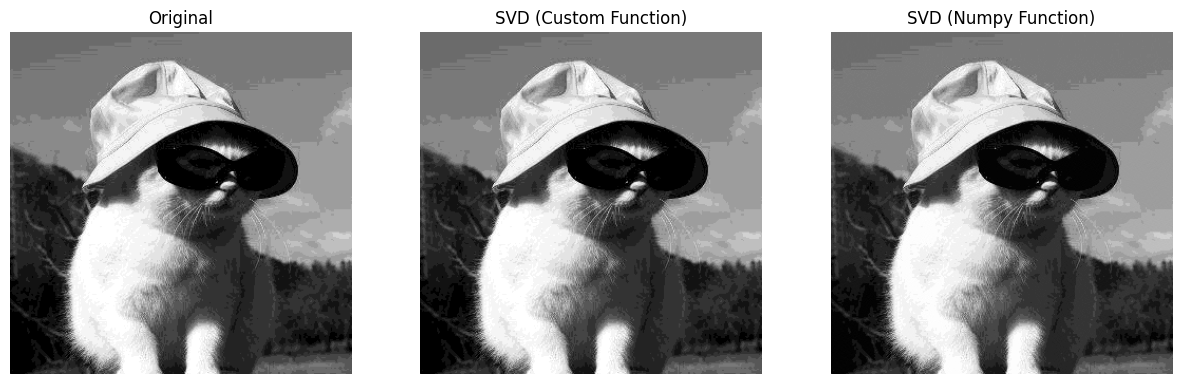

In [16]:
# img = mpimg.imread(FILE_PATH)
# img = mcolors.rgb_to_gray(img)

img_original = Image.open(FILE_PATH)
img_original = img_original.convert('L')
img_original = np.asarray(img_original)

_, _, _, img_svd_org = svd(img_original, 70)

img_np = numpy_svd(img_original, 0.7)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img_original, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(img_svd_org, cmap='gray')
axes[1].set_title('SVD (Custom Function)')
axes[1].axis('off')

axes[2].imshow(img_np, cmap='gray')
axes[2].set_title('SVD (Numpy Function)')
axes[2].axis('off')

plt.show()


In [17]:
print(f"Matriz obtida pelo método implementado:\n {img_svd_org}\n\n")
print(f"Matriz obtida pelo método implementado:\n {img_np}\n\n")

Matriz obtida pelo método implementado:
 [[106. 106. 106. ... 119. 119. 119.]
 [106. 106. 106. ... 119. 119. 119.]
 [106. 106. 106. ... 119. 119. 119.]
 ...
 [  7.   7.   7. ...  87.  87.  87.]
 [  7.   7.   7. ...  87.  87.  87.]
 [ 24.   7.   7. ...  87.  87.  87.]]


Matriz obtida pelo método implementado:
 [[106.41723398 105.69128124 106.09537052 ... 119.09504162 118.65603951
  118.51746155]
 [106.41723398 105.69128124 106.09537052 ... 119.09504162 118.65603951
  118.51746155]
 [106.40741259 105.49913484 105.89010009 ... 118.84244292 118.94302994
  119.12783867]
 ...
 [  6.85698793   6.6645265    8.41453865 ...  86.33486769  89.21403774
   87.73573177]
 [  6.98655778   7.64953017   4.81931366 ...  87.93909564  85.08814904
   87.43756825]
 [ 24.89575891   7.49264126   6.66568488 ...  87.03957761  86.55956599
   86.26907784]]




# Exercício 2: Interpolação

Para a função  $𝑓(𝑡)=1/1+25𝑡²$  no intervalo  [−1,1]  faça:

## a) Implemente as interpolações de Lagrange e de Newton.

In [18]:
def f(t):
    return 1 / (1 + 25 * t**2)

# Função de Interpolação de Lagrange
def lagrange_interp(xi, yi, x):
    n = np.size(xi)
    m = np.size(x)
    L = np.ones((n, m))

    for i in np.arange(n):
        for j in np.arange(n):
            if i != j:
                L[i, :] = (L[i, :] * (x - xi[j])) / (xi[i] - xi[j])

    y = yi.dot(L) #yi é vetor linha 1xn L é matriz nxm --> 1xm
    return y

# Função de Interpolação de Newton
def newton_interp(xi, yi, x):
    n = np.size(xi)
    ni = np.size(x)
    N = np.ones((n, ni))
    D = np.zeros((n, n))
    D[:, 0] = yi

    for j in np.arange(n - 1):
        for i in np.arange(n - j - 1):
            D[i, j + 1] = (D[i + 1, j] - D[i, j]) / (xi[i + j + 1] - xi[i])

    for i in np.arange(1, n):
        N[i, :] = N[i - 1, :] * (x - xi[i - 1])

    y = D[0, :].dot(N)
    return y

## b) Usando 11 pontos igualmente espaçados dentro do intervalo dado, calcule as interpolações de Lagrange e Newton com o código implementado no item anterior. Mostre os resultados em dois gráficos separados. Que resultado teórico justifica o fato das duas soluções serem iguais?

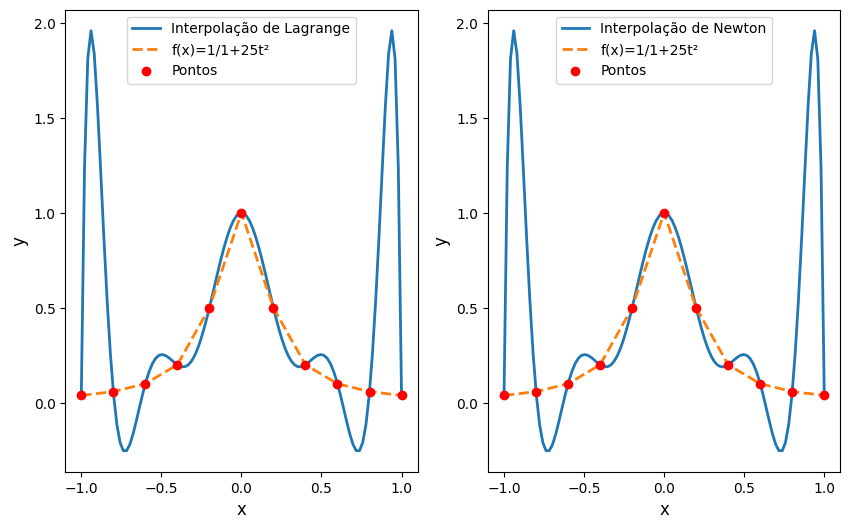

In [19]:
# Função para calcular o valor interpolado em um ponto específico

def interp_value_at(xi, yi, x_val, method='lagrange'):
    if method == 'lagrange':
        y_val = lagrange_interp(xi, yi, np.array([x_val]))
    elif method == 'newton':
        y_val = newton_interp(xi, yi, np.array([x_val]))
    else:
        raise ValueError("Método desconhecido: use 'lagrange' ou 'newton'")
    return y_val[0]

x_11 = np.linspace(-1, 1, num=11, endpoint=True) # Intervalo e pontos de interpolação
y_11 = f(x_11)

x = np.linspace(-1, 1, num=100, endpoint=True)

lagrange_y = lagrange_interp(x_11, y_11, x)
newton_y = newton_interp(x_11, y_11, x)


plt.figure(figsize=(10,6),facecolor='white')


plt.subplot(1, 2, 1)
plt.plot(x, lagrange_y, label = 'Interpolação de Lagrange',linewidth = 2,zorder=1)
plt.plot(x_11, y_11, label = 'f(x)=1/1+25t²',linewidth = 2,linestyle='--',zorder=2)
plt.scatter(x_11,y_11,label = 'Pontos',linewidth = 1,facecolor='red',zorder=3)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(x, newton_y, label = 'Interpolação de Newton',linewidth = 2,zorder=1)
plt.plot(x_11, y_11, label = 'f(x)=1/1+25t²',linewidth = 2,linestyle='--',zorder=2)
plt.scatter(x_11,y_11,label = 'Pontos',linewidth = 1,facecolor='red',zorder=3)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')

plt.legend()
plt.show()

O resultado teórico que justifica o fato das duas soluções serem iguais é a demonstração do teorema apresentado nos slides de Interpolação:

*Dados $(n + 1)$ pontos $(x0, y0), . . . , (xn, yn) com x0 < · · · < xn$, existe um único polinômio $Pn(x) ∈ Pn$ (polinômio de grau $n$) que satisfaz as condições de interpolação, isto é, que passa exatamente por todos esses pontos.*

**Demonstração:**

Para cada ponto $(xi,yi)$, impomos a condição de interpolação ao polinômio $Pn(x)$:

Para cada ponto \((x_i, y_i)\), impomos a condição de interpolação ao polinômio \( P_n(x) \):

\\

$$ P_n(x) = a_0 + a_1x + a_2x^2 + \cdots + a_nx^n $$

\\

Logo,

$$ y_i = P_n(x_i) = a_0 + a_1x_i + a_2x_i^2 + \cdots + a_nx_i^n, \quad i = 0, \ldots, n $$

Isso pode ser escrito em forma de sistema linear como:

\\

$$
\begin{bmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^n \\
1 & x_1 & x_1^2 & \cdots & x_1^n \\
1 & x_2 & x_2^2 & \cdots & x_2^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \cdots & x_n^n
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
\vdots \\
a_n
\end{bmatrix}
=
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
$$

\\

A matriz à esquerda é a matriz de Vandermonde \( X \). Para que exista uma solução única para o sistema, o determinante da matriz de Vandermonde deve ser não nulo.

O determinante da matriz de Vandermonde é dado por:

\\

$$ \det(X) = \prod_{i < k} (x_k - x_i) $$

\\

Como $( x_k \neq x_i $) para $( k \neq i )$, todos os termos $ (x_k - x_i) $ são não nulos, garantindo que o determinante é não nulo:

\\

$$ \det(X) \neq 0 $$

\\

Portanto, o sistema tem uma solução única, e o polinômio interpolador $ P_n(x) $ é único.

Sendo assim, tanto a interpolação de Lagrange quanto a interpolação de Newton calculam esse polinômio interpolador único, embora utilizem métodos diferentes para fazê-lo, como pode ser visto no código de implementação acima.

## c) Repita o processo, agora utilizando 21 pontos. O que houve?


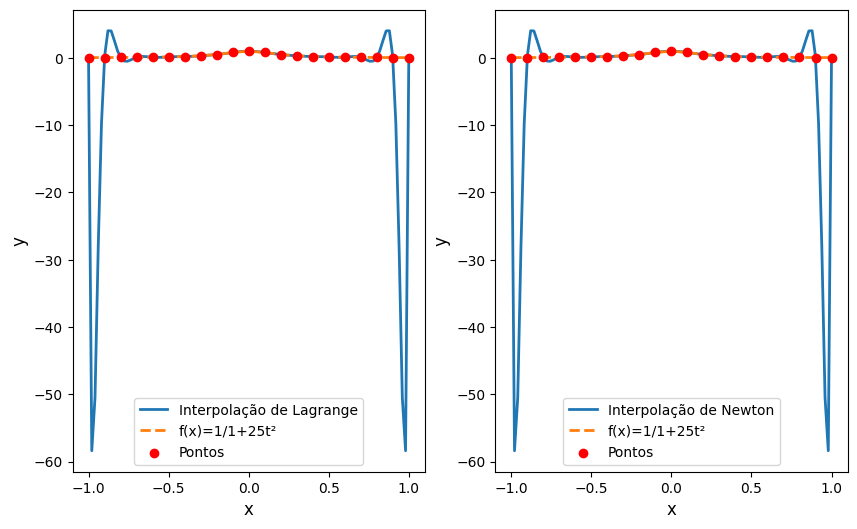

In [20]:
x_21 = np.linspace(-1, 1, num=21, endpoint=True) # Intervalo e pontos de interpolação
y_21 = f(x_21)

x = np.linspace(-1, 1, num=100, endpoint=True)

lagrange_y = lagrange_interp(x_21, y_21, x)
newton_y = newton_interp(x_21, y_21, x)


plt.figure(figsize=(10,6),facecolor='white')


plt.subplot(1, 2, 1)
plt.plot(x, lagrange_y, label = 'Interpolação de Lagrange',linewidth = 2,zorder=1)
plt.plot(x_21, y_21, label = 'f(x)=1/1+25t²',linewidth = 2,linestyle='--',zorder=2)
plt.scatter(x_21,y_21,label = 'Pontos',linewidth = 1,facecolor='red',zorder=3)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(x, newton_y, label = 'Interpolação de Newton',linewidth = 2,zorder=1)
plt.plot(x_21, y_21, label = 'f(x)=1/1+25t²',linewidth = 2,linestyle='--',zorder=2)
plt.scatter(x_21,y_21,label = 'Pontos',linewidth = 1,facecolor='red',zorder=3)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')

plt.legend()
plt.show()

Quando repetimos o processo de interpolação usando 21 pontos igualmente espaçados no intervalo [−1,1], observamos que a função interpolada começa a desestabilizar. Esse comportamento das interpolações é conhecido como o **Fenômeno de Runge**. O fenômeno de Runge ocorre quando aumentamos o número de pontos de interpolação de forma equidistante em um polinômio de interpolação de grau alto, levando a oscilações indesejadas nas regiões de extremidades do intervalo.

*   Não há garantias que $P_n$ converge para $f$ quando $n → ∞$
*   Interpolacão polinomial de alta ordem é instável em uma
distribuição uniforme de nós.

Ao plotar o gráfico das interpolações de Lagrange e Newton usando 21 pontos e compará-las com a função original, notamos oscilações acentuadas nas extremidades do intervalo, especificamente perto dos pontos -1 e 1. Essas oscilações indesejadas são características do Fenômeno de Runge. No entanto, a interpolação melhora à medida que nos aproximamos do centro do intervalo.

## d) Utilize a função  scipy.interpolate.interp1d para calcular interpolações cúbicas e lineares. Plote e compare com as soluções anteriores.


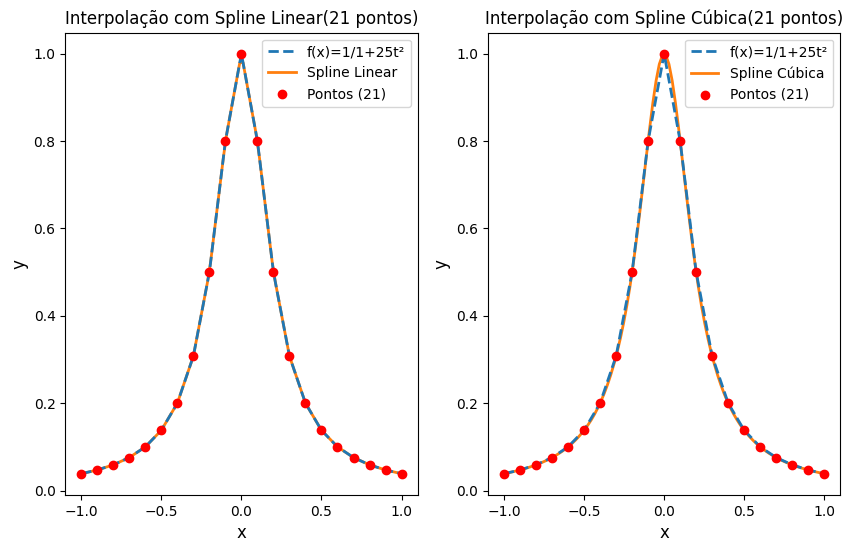

In [30]:
# Calculando interpolação com spline linear e cúbica
f_linear = interp1d(x_21, y_21, kind='linear')
f_cubica = interp1d(x_21, y_21, kind='cubic')

# Calculando os valores interpolados para os gráficos
y_linear = f_linear(x)
y_cubica = f_cubica(x)

plt.figure(figsize=(10,6),facecolor='white')

# Plotando os resultados
plt.subplot(1, 2, 1)
plt.plot(x_21, y_21, label='f(x)=1/1+25t²', linewidth=2, linestyle='--', zorder=2)
plt.plot(x, y_linear, label='Spline Linear', linewidth=2, zorder=1)
plt.scatter(x_21, y_21, label='Pontos (21)', linewidth=1, facecolor='red', zorder=3)
plt.xlabel('x', fontsize='large')
plt.ylabel('y', fontsize='large')
plt.legend()
plt.title('Interpolação com Spline Linear(21 pontos)')

# Plotando os resultados
plt.subplot(1, 2, 2)
plt.plot(x_21, y_21, label='f(x)=1/1+25t²', linewidth=2, linestyle='--', zorder=2)
plt.plot(x, y_cubica, label='Spline Cúbica', linewidth=2, zorder=1)
plt.scatter(x_21, y_21, label='Pontos (21)', linewidth=1, facecolor='red', zorder=3)
plt.xlabel('x', fontsize='large')
plt.ylabel('y', fontsize='large')
plt.legend()
plt.title('Interpolação com Spline Cúbica(21 pontos)')
plt.show()

### Conclusão - Diferenças das soluções deste item para os anteriores:

As splines dividem o intervalo em segmentos menores e usam polinômios de baixa ordem (geralmente lineares ou cúbicos) em cada segmento. Isso permite que a interpolação se ajuste melhor aos dados locais sem a necessidade de polinômios de alta ordem que podem levar a oscilações.

Sendo assim, os métodos de spline tendem a fornecer uma interpolação mais suave e visualmente agradável em comparação com os métodos de interpolação polinomial de Lagrange e Newton, especialmente quando muitos pontos são usados. As splines são particularmente úteis quando se deseja evitar oscilações indesejadas.

- **Suavidade**: As interpolações de spline linear e cúbica são suaves, ou seja, não apresentam as oscilações indesejadas do fenômeno de Runge. Elas fornecem curvas mais suaves e contínuas, mesmo com um número maior de pontos de interpolação.

- **Ajuste local**: As interpolações de spline ajustam-se localmente aos dados, levando em consideração os pontos vizinhos. Isso resulta em uma melhor adaptação aos dados e menor sensibilidade a variações nos pontos de interpolação e em regiões próximas aos extremos do intervalo.

- **Controle de suavidade**: A interpolação cúbica permite um maior controle sobre a suavidade da curva interpolada, pois utiliza polinômios de terceiro grau entre os pontos de interpolação.

## e) Repita os itens b) e c) com nós de Chebyshev. Comente os resultados obtidos. Por que este resultado é melhor do que os resultados obtidos nos itens b) e c) ?


<Figure size 1400x1000 with 0 Axes>

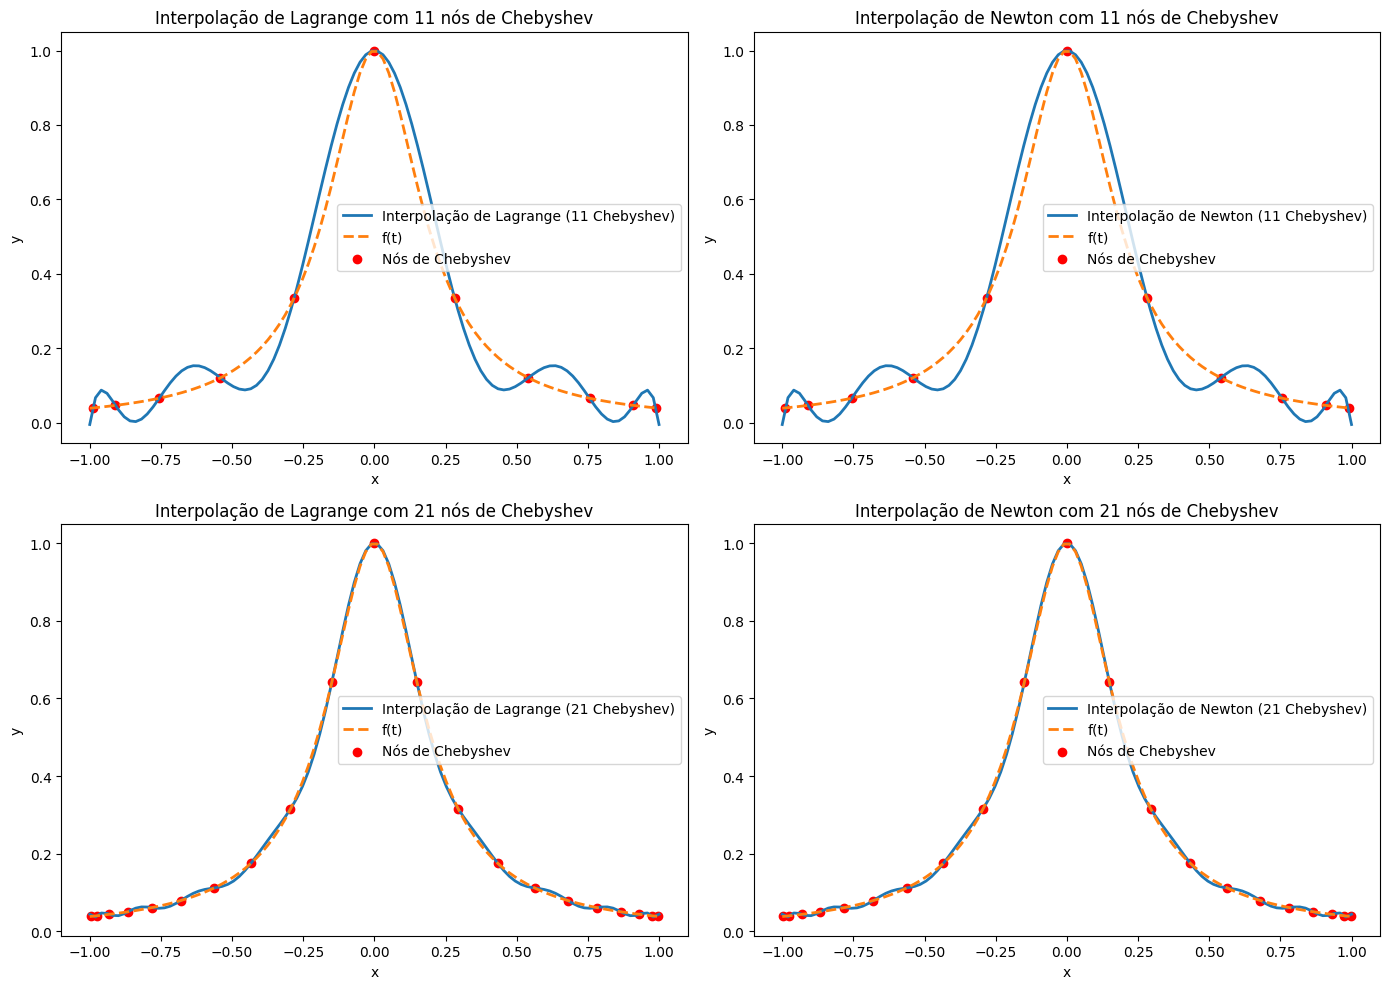

In [22]:
# Função para gerar nós de Chebyshev
def chebyshev_nodes(n, intervalo):
    a, b = intervalo
    k = np.arange(n)
    x_cheb = np.cos((2 * k + 1) * np.pi / (2 * n))
    return 0.5 * (a + b) + 0.5 * (b - a) * x_cheb


# Interpolação com nós de Chebyshev (11 pontos)
cheb_nodes_11 = chebyshev_nodes(11, [-1, 1])
y_cheb_11 = f(cheb_nodes_11)

lagrange_cheb_y_11 = lagrange_interp(cheb_nodes_11, y_cheb_11, x)
newton_cheb_y_11 = newton_interp(cheb_nodes_11, y_cheb_11, x)

# Interpolação com nós de Chebyshev (21 pontos)
cheb_nodes_21 = chebyshev_nodes(21, [-1, 1])
y_cheb_21 = f(cheb_nodes_21)

lagrange_cheb_y_21 = lagrange_interp(cheb_nodes_21, y_cheb_21, x)
newton_cheb_y_21 = newton_interp(cheb_nodes_21, y_cheb_21, x)

# Plotando os resultados
plt.figure(figsize=(14, 10), facecolor='white')



plt.tight_layout()
plt.show()

# Plotando os resultados para nós de Chebyshev
plt.figure(figsize=(14, 10), facecolor='white')

# 11 nós de Chebyshev
plt.subplot(2, 2, 1)
plt.plot(x, lagrange_cheb_y_11, label='Interpolação de Lagrange (11 Chebyshev)', linewidth=2)
plt.plot(x, f(x), label='f(t)', linewidth=2, linestyle='--')
plt.scatter(cheb_nodes_11, y_cheb_11, label='Nós de Chebyshev', facecolor='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolação de Lagrange com 11 nós de Chebyshev')

plt.subplot(2, 2, 2)
plt.plot(x, newton_cheb_y_11, label='Interpolação de Newton (11 Chebyshev)', linewidth=2)
plt.plot(x, f(x), label='f(t)', linewidth=2, linestyle='--')
plt.scatter(cheb_nodes_11, y_cheb_11, label='Nós de Chebyshev', facecolor='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolação de Newton com 11 nós de Chebyshev')

# 21 nós de Chebyshev
plt.subplot(2, 2, 3)
plt.plot(x, lagrange_cheb_y_21, label='Interpolação de Lagrange (21 Chebyshev)', linewidth=2)
plt.plot(x, f(x), label='f(t)', linewidth=2, linestyle='--')
plt.scatter(cheb_nodes_21, y_cheb_21, label='Nós de Chebyshev', facecolor='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolação de Lagrange com 21 nós de Chebyshev')

plt.subplot(2, 2, 4)
plt.plot(x, newton_cheb_y_21, label='Interpolação de Newton (21 Chebyshev)', linewidth=2)
plt.plot(x, f(x), label='f(t)', linewidth=2, linestyle='--')
plt.scatter(cheb_nodes_21, y_cheb_21, label='Nós de Chebyshev', facecolor='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolação de Newton com 21 nós de Chebyshev')

plt.tight_layout()
plt.show()

### Conclusão:

Os nós de Chebyshev são uma escolha ótima para minimizar o erro de interpolação polinomial. Eles são distribuídos de forma a concentrar mais pontos nas extremidades do intervalo e menos pontos no meio. Essa distribuição reduz significativamente o fenômeno de Runge, que é a oscilação indesejada dos polinômios interpoladores de alta ordem, especialmente perto das extremidades do intervalo. Eles são definidos usando os polinômios de Chebyshev e são distribuídos de maneira que sejam mais densos nas extremidades do intervalo e menos densos no meio. Isso ajuda a reduzir as oscilações indesejadas dos polinômios de alta ordem.

Como visto no item anterior, nós igualmente espaçados aumentam o erro. Assim, os nós de Chebyshev são uma maneira de calcular pontos que permitem melhores interpolações.

Ao plotar os gráficos, é possível observar que mesmo aumentando o número de nós as interpolações calculadas se portam bem.


# Exercício 3: Mínios Quadrados

Vamos supor que os casos acumulados de Covid-19, no período inicial da pandemia, de 26 de fevereiro de 2020 a 18 de junho de 2020 são dados em casosacumuladosbrasilatuaizado.txt. O objetivo deste exercício é estudar o ajuste dos dados, no sentido dos mínimos quadrados, a uma função $g(x) = ab^x$, com $a, b ∈ R$. Vamos utilizar os códigos implementados em aula:


In [23]:
def mmq_qr(x, y, k):
  X = np.vander(x, k)
  Q, R = np.linalg.qr(X)
  b = Q.T @ y
  a = np.linalg.solve(R, b)
  return a


def mmq(x, y, k):
  X = np.vander(x, k)
  A = X.T @ X
  b = X.T @ y
  a = np.linalg.solve(A, b)
  return a


## a) Explique cada um dos códigos dados acima. O que está sendo calculado ?

Os dois códigos fornecem métodos para ajustar uma curva aos dados usando o método dos mínimos quadrados (MMQ). Eles implementam duas abordagens diferentes para resolver o problema de mínimos quadrados: uma usando a equação normal e outra usando a decomposição QR.

- Na abordagem usando a equação normal, a matriz de Vandermonde é construída a partir dos valores de x, e a solução é obtida multiplicando as transpostas dessa matriz e resolvendo o sistema linear resultante. Essa abordagem é direta e simples de implementar. No entanto, a equação normal pode ser numericamente instável quando lidamos com matrizes mal condicionadas, ou seja, uma matriz que é muito sensível aos erros de aproximação cometidos em cálculos numéricos usualmente executados no tratamento de problemas aplicados, podendo levar a resultados imprecisos.

- Para isso, a fatoração QR oferece uma solução alternativa em mínimos quadrados para um sistema linear $Ax = b:$ se $A = QR$. Nesta abordagem, a matriz de Vandermonde é decomposta em uma matriz ortogonal Q e uma matriz triangular superior R, e o sistema linear resultante é então resolvido. A vantagem principal da decomposição QR é a sua maior estabilidade numérica, o que a torna especialmente útil para matrizes mal condicionadas. Entretanto, essa abordagem pode ser mais computacionalmente custosa em comparação com a equação normal, dado o fato da matriz R ser triangular superior.


## b) Aproxime, no sentido dos mínimos quadrados, os dados do período completo, de 26 de fevereiro de 2020 a 18 de junho de 2020, por uma função $g(x) = ab^x$, com $a, b ∈ R$. Use um dos códigos dados acima.

Para realizar a aproximação dos dados no sentido dos mínimos quadrados precisamos seguir os seguintes passos:

1) Carregar os dados do arquivo de texto;

2) Transformar a função exponencial em uma forma linearizável;

3) Aplicar o método dos mínimos quadrados para ajustar a função linearizada;

4) Calcular os parâmetros da função original.

In [24]:
#1 Carregar os dados do arquivo de texto

def carregar_dados():
    data = np.loadtxt(FILE_PATH_2)
    x = np.arange(1, len(data) + 1)  #dias correspondentes aos dados
    print(x)
    y = data  #número de casos
    return x, y

### Transformar a função exponencial em uma forma linearizável.

$$y = ab^x$$

$$log(y) = log(a) + xlog(b)$$

\\

Fazendo com que $y = log(a), a = log(a)$ e $b = log(b)$, temos:

$$ y = a +bx$$

### Aplicar o méotdo à função linearizada

In [31]:
x, y = carregar_dados()

# y = np.log(y) -- ajuste para linearizar
coeficientes = mmq(x, np.log(y),2) #coeficientes a e b estão invertidos

#imprimir os coeficientes
print("Coeficientes ajustados:")
print(f"a =",coeficientes[1])
print(f"b =",coeficientes[0])

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118]
Coeficientes ajustados:
a = 3.4586750364025454
b = 0.10557730812239277


### Calcular os parâmetros originais:

In [26]:
def f(x):
    return np.exp(coeficientes[1]) * np.exp(coeficientes[0])**x

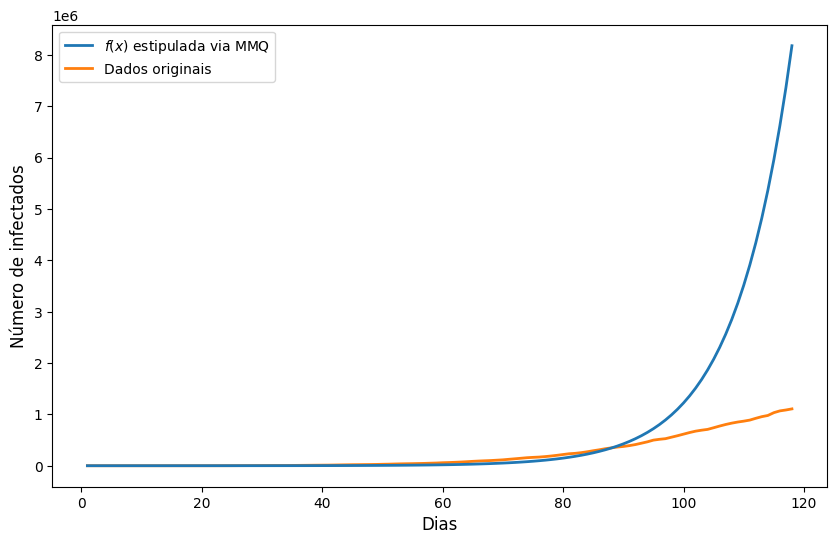

In [32]:
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x, f(x), label = '$f(x)$ estipulada via MMQ',linewidth = 2,linestyle='-',zorder=2)
plt.plot(x, y, label = 'Dados originais',linewidth = 2,zorder=1)
plt.xlabel('Dias',fontsize='large')
plt.ylabel('Número de infectados',fontsize='large')

plt.legend()
plt.show()

## c) Repita o item b) usando apenas os 20 primeiros dias.


Coeficientes ajustados:
a = -0.8326707582076477
b = 0.3160641546747851


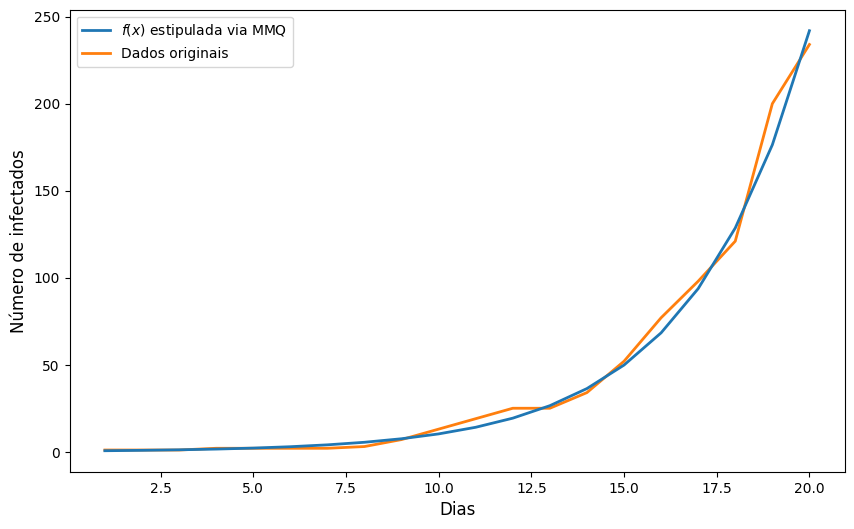

In [33]:
x_20 = x[:20]
y_20 = y[:20]

coeficientes = mmq_qr(x_20, np.log(y_20), 2) #coeficientes a e b estão invertidos


#imprimir os coeficientes
print("Coeficientes ajustados:")
print(f"a =",coeficientes[1])
print(f"b =",coeficientes[0])

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x_20, f(x_20), label = '$f(x)$ estipulada via MMQ',linewidth = 2,linestyle='-',zorder=2)
plt.plot(x_20, y_20, label = 'Dados originais',linewidth = 2,zorder=1)
plt.xlabel('Dias',fontsize='large')
plt.ylabel('Número de infectados',fontsize='large')
plt.legend()
plt.show()


## d) Repita o ítem b) usando apenas os 50 últimos dias.

Coeficientes ajustados:
a = 7.798501737394586
b = 0.054476229013592226


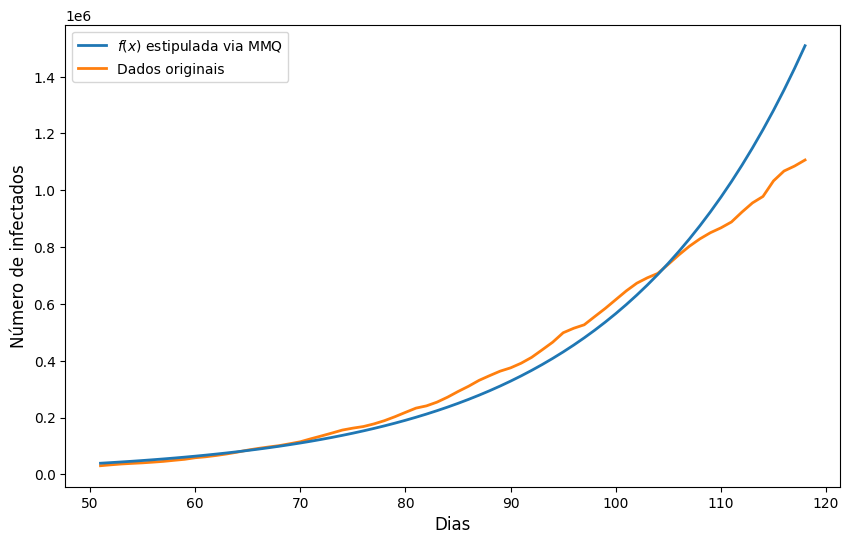

In [34]:
x_50 = x[50:]
y_50 = y[50:]

coeficientes = mmq_qr(x_50, np.log(y_50), 2)

#imprimir os coeficientes
print("Coeficientes ajustados:")
print(f"a =",coeficientes[1])
print(f"b =",coeficientes[0])

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x_50, f(x_50), label = '$f(x)$ estipulada via MMQ',linewidth = 2,linestyle='-',zorder=2)
plt.plot(x_50, y_50, label = 'Dados originais',linewidth = 2,zorder=1)
plt.xlabel('Dias',fontsize='large')
plt.ylabel('Número de infectados',fontsize='large')

plt.legend()
plt.show()

### Conclusão: Compare os itens b), c) e d). Que tipo de informação os dados nos fornecem?

A curva com todos os dias completos mostra a tendência geral. Ao analisar com mais profundidade, nos primeiros 20 dias, podemos ver como os casos evoluíram sem medidas preventivas significativas. No início, parecia que a evolução dos casos seguia uma tendência exponencial clara e consistente. No entanto, à medida que avançamos para os últimos 50 dias, com o apoio de medidas externas, foram implementadas medidas que puderam achatar a curva, diminuindo o número diário de infectados.

Em resumo, inicialmente a disseminação dos casos parecia seguir um padrão exponencial, mas com o passar do tempo e a implementação de medidas preventivas, a tendência mudou, mostrando uma normalização e uma redução no crescimento diário de casos. Isso evidencia a importância das intervenções e políticas públicas na modulação da trajetória da pandemia.
